In [1]:
#pip install textlob-fr
#pip install pyspellchecker

In [2]:
#Importing libraries
import os
import sys
import unicodedata
import pandas as pd
import re 
import nltk
import sklearn
from textblob_fr.fr import Spelling       
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from spellchecker import SpellChecker
from langdetect import detect, DetectorFactory
from deep_translator import GoogleTranslator
DetectorFactory.seed = 0

In [3]:


def find_files(filename, search_path):
    result = []
    # Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result
fi=sys.argv[1]
if len(fi.split('.'))==2:
    fi=find_files(sys.argv[1],"C:\\")[0]
datafi=find_files(sys.argv[2],"C:\\")[0]

In [5]:
if len(fi.split('.'))==2:
    df=pd.read_csv(fi,sep=';',names=['id','Nature marchandise'],encoding='ISO-8859-15')
    df.drop(df.index[0],0,inplace=True)
    df.drop(['id'],axis=1,inplace=True)
else:
    df=pd.DataFrame(data={'Nature marchandise':[fi]})
df

,Nature marchandise
0,tomato


In [6]:
df.dtypes

Nature marchandise    object
dtype: object

In [7]:
df.isna().sum()

Nature marchandise    0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df['Nature marchandise corr']=df['Nature marchandise']

In [10]:
df['Nature marchandise'].nunique()

1

In [11]:
df['Nature marchandise'].value_counts()

tomato    1
Name: Nature marchandise, dtype: int64

In [12]:
print("le nombre de lignes contenant plus qu'un mot est : ",df[df['Nature marchandise'].str.contains(' ')].count()[0])

le nombre de lignes contenant plus qu'un mot est :  0


In [13]:
print('vide : ',df[df['Nature marchandise']=='vide'].count()[0])
print('vides : ',df[df['Nature marchandise']=='vides'].count()[0])

vide :  0
vides :  0


In [14]:
print('diver : ',df[df['Nature marchandise']=='diver'].count()[0])
print('divers : ',df[df['Nature marchandise']=='divers'].count()[0])

diver :  0
divers :  0


In [15]:
def wordCloud(data, max_words):
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,collocations=False).generate(" ".join(data))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)

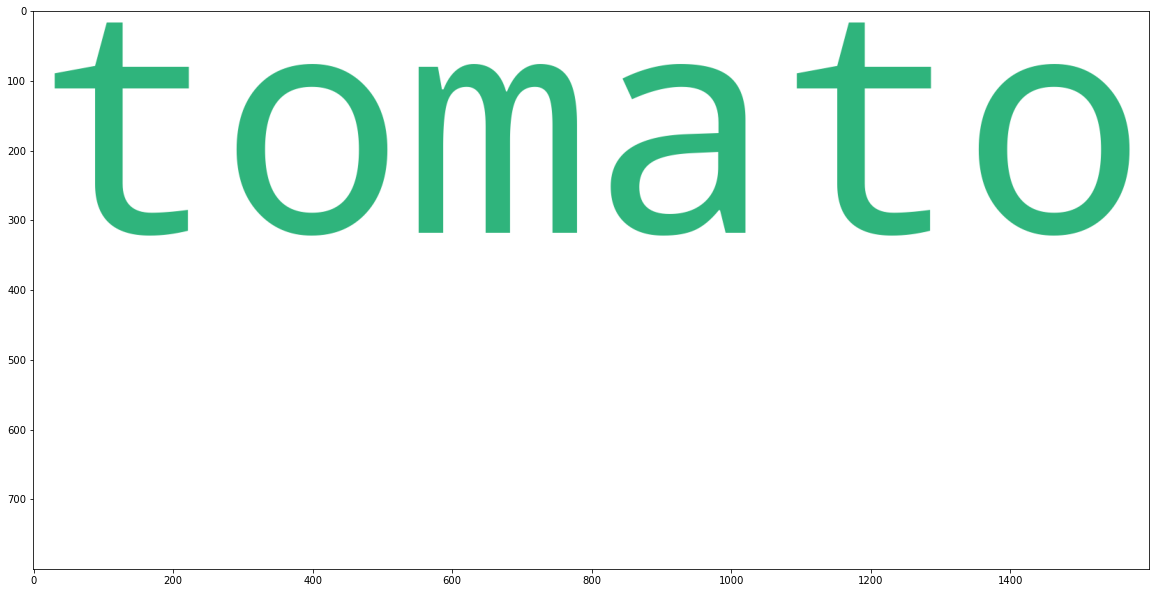

In [16]:
wordCloud(df['Nature marchandise'],200)

In [17]:
#from sklearn.feature_extraction.text import CountVectorizer
#corpus=df["Nature marchandise"]
#count_vector = CountVectorizer() 

In [18]:
#X = count_vector.fit_transform(corpus).toarray()
#X

In [19]:
#frequency_matrix = pd.DataFrame(X,columns=count_vector.get_feature_names())
#frequency_matrix

In [20]:
#frequency of the terms
#freq_mots = np.sum(X,axis=0)
#print(freq_mots)
#print('****')
#argmax
#index = np.argsort(freq_mots)
#print(index)
#print('****')
#print the terms and their frequency
#imp = {'terme':np.asarray(count_vector.get_feature_names())[index],'freq':freq_mots[index]}
#print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

In [21]:
df['Nature marchandise corr']=df['Nature marchandise corr'].str.lower()

In [22]:
df['Nature marchandise corr'].replace(regex={"âš":"","âž":"'","`":"'",'ââ\x80â\x99':"'",'ã£â\x96':'o','ã£â\x89':'é','ã£â\x8b':'é','ã£âa':'','ã£â\x89':'m','ã£âe':'m','ã£âª':'ê','ã£â\x8d':'i','ã£â\x80':'à','ã£â\x8f':'ï','ã£â\x9b':'e','ã£â\x88':'è','ã£â\x9c':'u','ã£â§':'ç','\bã£\b':'à','Ã£Â¹':'e','ã£â\x82':'â','ã£â\x93':'ó','ã£â\x8e':'i','ã£â\x91':'in','ã£â\x84':'e','ã£â\x81':'a','ã¢â�â�':"'",'�':'e','¹':'','ã©':'é','ã¨':'è','ã¢':'â','#xd':'','\+':' ','\d+':'','//':'/','///':'/','\/':' ','\.':'','\:':' ','\-':' ','ã�':'é','\;':' ','\(':' ','\)':'','\,':' ','\[':'','\]':'','\%':'','\?':'','\*':'','â°':'','ââ\x80â\x99':"'",'ââ\x80â\x8b':'','ã¥â\x92':'œ','=':''},inplace=True)

In [23]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

df['Nature marchandise corr']=df['Nature marchandise corr'].apply(lambda x : search_words(x))

In [24]:
def split_str_from_words(l, s):
    l=sorted(l, reverse=True, key=lambda el: len(el))
    m = re.split(rf"({'|'.join(l)})", s)
    return [i for i in m if i]

In [25]:
spell = SpellChecker(language='fr')
spell.word_frequency.load_text_file(datafi)

In [26]:
#dealing with long rattached terms
long=set(df['Nature marchandise corr'].str.findall(r'([a-z]{14,})').sum())
f=open(datafi,'r',encoding='utf-8-sig')
s=f.read()
f.close()
l=re.split(' |\n',s)
l1=list(spell.word_frequency.dictionary.keys())
l=list(set(l+l1))
l=[x for x in l if len(x)>=6]
longcor=[]
for x in long:
    longcor.append(' '.join(split_str_from_words(l,x)))

In [27]:
long=[r'\b'+x+r'\b' for x in long]

In [28]:
df['Nature marchandise corr'].replace(long,longcor,regex=True,inplace=True)

In [29]:
df['Nature marchandise corr'].replace(r'(\bart[^(on)i]\B)','article ',regex=True,inplace=True)

In [30]:
df['Nature marchandise corr'].replace(r"\b[a-z]\s+",'',regex=True,inplace=True)
df['Nature marchandise corr'].replace(r'\b[a-z]{2}\b','',regex=True,inplace=True)

In [31]:
df['Nature marchandise corr']=df['Nature marchandise corr'].str.lower()
df['Nature marchandise corr']=df['Nature marchandise corr'].str.strip()
df['Nature marchandise corr'].replace('\bdiver\b','divers',regex=True,inplace=True)
df['Nature marchandise corr'].replace(r'\bvides\b','vide',regex=True,inplace=True)
df['Nature marchandise corr'].replace(r'\bacc\b','accessoires',regex=True,inplace=True)
df['Nature marchandise corr'].replace(r'\bauto\b','automobile',regex=True,inplace=True)

In [32]:
#li=list(zip(count_vector.get_feature_names(),list(freq_mots)))
#dffreq=pd.DataFrame(li,columns=['terme', 'freq'])
#dffreq.to_csv('fffreq.txt',index=False)

### Spacy

In [33]:
'''from spacy_langdetect import LanguageDetector
from spacy.language import Language
import spacy
nlp = spacy.load("en_core_web_sm")  

@Language.factory('language_detector')
def language_detector(nlp, name):
    return LanguageDetector()

nlp.add_pipe('language_detector', last=True)
'''

'from spacy_langdetect import LanguageDetector\nfrom spacy.language import Language\nimport spacy\nnlp = spacy.load("en_core_web_sm")  \n\n@Language.factory(\'language_detector\')\ndef language_detector(nlp, name):\n    return LanguageDetector()\n\nnlp.add_pipe(\'language_detector\', last=True)\n'

In [34]:
#word=nlp('hello')
#detect_language = word._.language
#print(detect_language)

### Autocorrect

In [35]:
#from autocorrect import Speller 
#lil=" ".join(list(df['Nature marchandise corr'])[:200])
#spellerfrench=Speller(lang='fr')
#Corrected_ = spellerfrench(lil)


In [36]:
#Corrected_

### textblob

In [37]:
def sumlists(l):
    L=[]
    for i in range(len(l)):
        L+=l.iloc[i]
    return(L)

In [38]:
lili=sumlists(df['Nature marchandise corr'].str.split())
#lili

In [39]:
from textblob import TextBlob

In [40]:
from textblob_fr.fr import Spelling       
import re

textToLower = ""

f1=open(datafi,"r",encoding='utf-8-sig')               # Opening our source file
text = f1.read()                                  # Reading the file                 
textToLower = text.lower()                        # Lowering all the capital letters

words = re.findall(r'\b[^\d\W]+\b', textToLower)           # Finding all the words and place them into a list    
oneString = " ".join(words)                           # Joining them into one string

pathToFile = "train.txt"                              # The path we want to store our stats file at
spelling = Spelling(path = pathToFile)                # Connect the path to the Spelling object
spelling.train(oneString, pathToFile)                 # Train

### correction esp and eng 

In [41]:
#extract all words that ends with 'o' or 'os'
os=set(re.findall(r'[a-zA-Z]+os?\b',' '.join(lili)))
#extract all words that ends with 'a' or 'as'
aas=set(re.findall(r'[a-zA-Z]+as?\b',' '.join(lili)))
#extract all words that ends with 'dor'
dor=set(re.findall(r'[a-zA-Z]+dor?\b',' '.join(lili)))
#extract all words that ends with 'ito'
ito=set(re.findall(r'[a-zA-Z]+itos?\b',' '.join(lili)))
#extract all words that ends with 'ita'
ita=set(re.findall(r'[a-zA-Z]+itas?\b',' '.join(lili)))

In [42]:
esp=os.union(aas,dor,ito,ita)

In [43]:
ing=set(re.findall(r'[a-zA-Z]+ing\b',' '.join(lili)))
y=set(re.findall(r'[a-zA-Z]+y\b',' '.join(lili)))
ic=set(re.findall(r'[a-zA-Z]+ic\b',' '.join(lili)))

In [44]:
eng=ing.union(y,ic)

In [45]:
spell = SpellChecker(language='fr')
spell.word_frequency.load_text_file(datafi)
misspelled = spell.unknown(lili)
short=[r'\b'+x+r'\b' for x in misspelled if len(x)<=3]
misspelled=[x for x in misspelled if len(x)>3]
es=[]
fr=[]
other=[]
if misspelled:
    for word in misspelled:
        if detect(word) in ['es','pt']:
            es.append(word)
        elif (word not in esp) and (word not in eng):
            fr.append(word)

In [46]:
df['Nature marchandise corr'].replace(short,'',regex=True,inplace=True)

In [47]:
fr=set(fr)
es=set(es)

In [48]:
print('Non reconnus fr',len(fr))
print('Non reconnus es',len(es))

Non reconnus fr 0
Non reconnus es 0


In [49]:
espagnol=set(es).union(esp)

In [50]:
espagnol=list(espagnol)

In [51]:
speller = SpellChecker(language='es')
speller.word_frequency.load_text_file(datafi)
misspes=speller.unknown(espagnol)
for word in misspes:
     espagnol[espagnol.index(word)]=speller.correction(word)

In [52]:
if espagnol:
    esptrad=GoogleTranslator(source='es', target='fr').translate_batch(espagnol)

In [53]:
if espagnol:
    espfr=list(zip(espagnol,esptrad))

In [54]:
espagnol=[r'\b'+x+r'\b' for x in espagnol]

In [55]:
if espagnol:
    df['Nature marchandise corr'].replace(espagnol,esptrad,regex=True,inplace=True)

In [56]:
df['Nature marchandise corr']=df['Nature marchandise corr'].str.lower()

In [57]:
if eng:
    engtrad=GoogleTranslator(source='en', target='fr').translate_batch(eng)

In [58]:
eng=[r'\b'+x+r'\b' for x in eng]

In [59]:
if eng:
    df['Nature marchandise corr'].replace(eng,engtrad,regex=True,inplace=True)

In [60]:
print('correction french')

correction french


## correction fr

### Phonex

In [61]:
def remove_accents(input_str):
    """
    >>> remove_accents("héhé")
    "hehe
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode("utf8")

def phonex(chaine):
    """Phonex est un algorithme de Soundex plus perfectionné encore que la version francisée de Soundex2.
    Sachez que Phonex est optimisée pour le langage français, sait reconnaître différents types de sons comme les sons
    ‘on’, ‘ai’, ‘ein’, etc...
    et place son résultat sous la forme d’un réel de type double précision (5.0 x 10-324 .. 1.7 x
    10308 sur 15 à 16 chiffres significatifs). Son temps de calcul est double de Soundex et 30% supérieure seulement
    à Soundex2.
    >>> phonex("PHYLAURHEIMSMET")
    0.29241361598339205
    :param chaine: La chaine de caractères à encoder
    :return: L'encodage sous forme de nombre à virgule flottante
    """
    # 0 On met la chaîne en majuscules, on vire les caractères parasites
    chaine = remove_accents(chaine)
    chaine = re.sub(r"[ \(\)\-.+*/,:;_']", "", chaine)
    chaine = chaine.upper()

    # 1 remplacer les y par des i
    r = chaine.replace('Y', 'I')

    # 2 supprimer les h qui ne sont pas précédées de c ou de s ou de p
    r = re.sub(r'([^PCS])H', r'\1', r)

    # 3 remplacement du ph par f
    r = r.replace(r'PH', r'F')

    # 4 remplacer les groupes de lettres suivantes :
    r = re.sub(r'G(AI?[NM])', r'K\1', r)

    # 5 remplacer les occurrences suivantes, si elles sont suivies par une lettre a, e, i, o, ou u :
    r = re.sub(r'[AE]I[NM]([AEIOU])', r'YN\1', r)

    # 6 remplacement de groupes de 3 lettres (sons 'o', 'oua', 'ein') :
    r = r.replace('EAU', 'O')
    r = r.replace('OUA', '2')
    r = r.replace('EIN', '4')
    r = r.replace('AIN', '4')
    r = r.replace('EIM', '4')
    r = r.replace('AIM', '4')

    # 7 remplacement du son É:
    r = r.replace('É', 'Y')  # CP : déjà fait en étape 0
    r = r.replace('È', 'Y')  # CP : déjà fait en étape 0
    r = r.replace('Ê', 'Y')  # CP : déjà fait en étape 0
    r = r.replace('AI', 'Y')
    r = r.replace('EI', 'Y')
    r = r.replace('ER', 'YR')
    r = r.replace('ESS', 'YS')
    r = r.replace('ET', 'YT')  # CP : différence entre la version Delphi et l'algo
    r = r.replace('EZ', 'YZ')

    # 8 remplacer les groupes de 2 lettres suivantes (son â..anâ.. et â..inâ..), sauf sâ..il sont suivi par une
    # lettre a, e, i o, u ou un son 1 Ã  4 :
    r = re.sub(r'AN([^AEIOU1234])', r'1\1', r)
    r = re.sub(r'ON([^AEIOU1234])', r'1\1', r)
    r = re.sub(r'AM([^AEIOU1234])', r'1\1', r)
    r = re.sub(r'EN([^AEIOU1234])', r'1\1', r)
    r = re.sub(r'EM([^AEIOU1234])', r'1\1', r)
    r = re.sub(r'IN([^AEIOU1234])', r'4\1', r)

    # 9 remplacer les s par des z sâ..ils sont suivi et précédés des lettres a, e, i, o,u ou dâ..un son 1 Ã  4
    r = re.sub(r'([AEIOUY1234])S([AEIOUY1234])', r'\1Z\2', r)
    # CP : ajout du Y Ã  la liste

    # 10 remplacer les groupes de 2 lettres suivants :
    r = r.replace('OE', 'E')
    r = r.replace('EU', 'E')
    r = r.replace('AU', 'O')
    r = r.replace('OI', '2')
    r = r.replace('OY', '2')
    r = r.replace('OU', '3')

    # 11 remplacer les groupes de lettres suivants
    r = r.replace('CH', '5')
    r = r.replace('SCH', '5')
    r = r.replace('SH', '5')
    r = r.replace('SS', 'S')
    r = r.replace('SC', 'S')  # CP : problème pour PASCAL, mais pas pour PISCINE ?

    # 12 remplacer le c par un s s'il est suivi d'un e ou d'un i
    # CP : à mon avis, il faut inverser 11 et 12 et ne pas faire la dernière ligne du 11
    r = re.sub(r'C([EI])', r'S\1', r)

    # 13 remplacer les lettres ou groupe de lettres suivants :
    r = r.replace('C', 'K')
    r = r.replace('Q', 'K')
    r = r.replace('QU', 'K')
    r = r.replace('GU', 'K')
    r = r.replace('GA', 'KA')
    r = r.replace('GO', 'KO')
    r = r.replace('GY', 'KY')

    # 14 remplacer les lettres suivante :
    r = r.replace('A', 'O')
    r = r.replace('D', 'T')
    r = r.replace('P', 'T')
    r = r.replace('J', 'G')
    r = r.replace('B', 'F')
    r = r.replace('V', 'F')
    r = r.replace('M', 'N')

    # 15 Supprimer les lettres dupliquées
    oldc = '#'
    newr = ''
    for c in r:
        if oldc != c: newr = newr + c
        oldc = c
    r = newr

    # 16 Supprimer les terminaisons suivantes : t, x
    r = re.sub(r'(.*)[TX]$', r'\1', r)

    # 17 Affecter à chaque lettre le code numérique correspondant en partant de la dernière lettre
    num = ['1', '2', '3', '4', '5', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'N', 'O', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', 'Z']
    l = []
    for c in r:
        l.append(num.index(c))

    # 18 Convertissez les codes numériques ainsi obtenu en un nombre de base 22 exprimé en virgule flottante.
    res = 0.
    i = 1
    for n in l:
        res = n * 22 ** -i + res
        i = i + 1

    return res

In [62]:
f=open(datafi,'r',encoding='utf-8-sig')
s=f.read()
f.close()
l=set(re.split(' |\t|\n',s))
l=[x for x in l if len(x)>=4]
p=[phonex(x)*10**14//10 for x in l]


In [63]:
lphonex=dict(zip(l,p))

In [64]:
#pipeline

corrected=[]
for x in fr:
    a=0
    for key, value in lphonex.items():
        if value == phonex(x)*10**14//10:
            corrected.append(key)
            a=1
            break
    if a==0:
        corrected.append(x)
    

In [65]:
misspelled1 = spell.unknown(corrected)
for word in misspelled1:
    corrected[corrected.index(word)]=spell.correction(word)

In [66]:
misspelled2 = spell.unknown(corrected)
for x in misspelled2:
    corrected[corrected.index(x)] = spelling.suggest(x)[0][0]

In [67]:
fr=[r'\b'+x+r'\b' for x in fr]

In [68]:
df['Nature marchandise corr'].replace(fr,corrected,regex=True,inplace=True)

In [69]:
df['Nature marchandise corr'].replace(regex={"âš":"","âž":"'","`":"'",'ââ\x80â\x99':"'",'ã£â\x96':'o','ã£â\x89':'é','ã£â\x8b':'é','ã£âa':'','ã£â\x89':'m','ã£âe':'m','ã£âª':'ê','ã£â\x8d':'i','ã£â\x80':'à','ã£â\x8f':'ï','ã£â\x9b':'e','ã£â\x88':'è','ã£â\x9c':'u','ã£â§':'ç','\bã£\b':'à','Ã£Â¹':'e','ã£â\x82':'â','ã£â\x93':'ó','ã£â\x8e':'i','ã£â\x91':'in','ã£â\x84':'e','ã£â\x81':'a','ã¢â�â�':"'",'�':'e','¹':'','ã©':'é','ã¨':'è','ã¢':'â','#xd':'','\+':' ','\d+':'','//':'/','///':'/','\/':' ','\.':'','\:':' ','\-':' ','ã�':'é','\;':' ','\(':' ','\)':'','\,':' ','\[':'','\]':'','\%':'','\?':'','\*':'','â°':'','ââ\x80â\x99':"'",'ââ\x80â\x8b':'','ã¥â\x92':'œ','=':''},inplace=True)

In [70]:
df['Nature marchandise corr'].replace(r"\b[a-z]\s+",'',regex=True,inplace=True)
df['Nature marchandise corr'].replace(r'\b[a-z]{2}\b','',regex=True,inplace=True)

In [71]:
if len(fi.split('.'))==2:
    df.to_csv('naturemodifie.csv',encoding='utf-8-sig')
else:
    print('le mot correct est: ',df['Nature marchandise corr'][0])

In [74]:
lili=sumlists(df['Nature marchandise corr'].str.split())

In [76]:
if espagnol:
    lesp=spell.unknown(esptrad)
    
    misspelledesp = []
    for x in lesp:
        misspelledesp+=re.split(" |\-|\'",x)
    misspelledesp=list(spell.unknown(misspelledesp))
if eng:
    misspelledeng=spell.unknown(engtrad)
misspelledfr = spell.unknown(corrected)


In [78]:
print('misspelled fr : ',len(misspelledfr))
if espagnol:
    print('misspelled esp : ',len(misspelledesp))
else:
    print('misspelled esp : ',0)
if eng:
    print('misspelled eng : ',len(misspelledeng))
else:
    print('misspelled eng : ',0)

misspelled fr :  0
misspelled esp :  0
misspelled eng :  0
